<a href="https://colab.research.google.com/github/ahathaway821/COVID-19-Fact-Checking/blob/master/src/data-scraping/politifact_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install beautifulsoup4
!pip install soupsieve
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import Request, urlopen
from datetime import date

In [5]:
num_pages = 15
data = []
for i in range(1, num_pages + 1):
    url = 'https://www.politifact.com/factchecks/list/?page=' + str(i) + '&category=coronavirus'
    req = Request(url , headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()

    soup = BeautifulSoup(webpage, 'html.parser')
    facts = soup.find_all('li', attrs={'class':'o-listicle__item'})

    for fact in facts:
        # print(fact)
        who_posted = fact.find('a', attrs={'class':'m-statement__name'}).text.strip('\n')
        when_posted = fact.find('div', attrs={'class':'m-statement__desc'}).text.strip('\n')
        date = when_posted.split(" ")[2:5]
        what_posted = fact.find('div', attrs={'class':'m-statement__quote'}).text.strip('\n')
        rating_div = fact.find('div', attrs={'class':'m-statement__meter'})
        rating = rating_div.find('img', attrs={'class':'c-image__thumb'})['alt'].strip('\n')
        link = fact.find('div', attrs={'class':'m-statement__quote'})
        article_link = link.find('a')['href'].strip('\n')
        data.append({
            'claim': what_posted,
            'date': " ".join(date),
            'source': 'Politifact',
            'source_label': rating,
            'claim_source': who_posted,
            'explanation': '',
            'fact_check_url': 'https://politifact.com' + str(article_link)
        })

df = pd.DataFrame(data)
df

,claim,date,source,source_label,claim_source,explanation,fact_check_url
0,“Research illustrates a clear correlation betw...,"May 21, 2020",Politifact,true,Glenn Grothman,,https://politifact.com/factchecks/2020/jun/08/...
1,“She’s just casually carrying a body with 1 ha...,"June 3, 2020",Politifact,false,Viral image,,https://politifact.com/factchecks/2020/jun/05/...
2,“You see suicide rates are skyrocketing now…”,"May 26, 2020",Politifact,false,Tim Murtaugh,,https://politifact.com/factchecks/2020/jun/04/...
3,"“According to the CDC, so far this year, Flori...","May 27, 2020",Politifact,false,Facebook posts,,https://politifact.com/factchecks/2020/jun/03/...
4,Says Nancy Pelosi tried “once again” to includ...,"May 13, 2020",Politifact,barely-true,Bloggers,,https://politifact.com/factchecks/2020/jun/02/...
...,...,...,...,...,...,...,...
437,"Says a ""Clorox bottle claimed it could kill (t...","January 28, 2020",Politifact,false,Facebook posts,,https://politifact.com/factchecks/2020/jan/30/...
438,"Says the Chinese Communist Party ""will finally...","January 25, 2020",Politifact,false,Bloggers,,https://politifact.com/factchecks/2020/jan/28/...
439,"""CORONAVIRUS: Reports of 10,000 DEAD in Wuhan,...","January 24, 2020",Politifact,pants-fire,Facebook posts,,https://politifact.com/factchecks/2020/jan/28/...
440,"Says China ""stole Coronavirus from Canada and ...","January 26, 2020",Politifact,false,Bloggers,,https://politifact.com/factchecks/2020/jan/28/...


In [6]:
# add label
df.source_label.unique()

array(['true', 'false', 'barely-true', 'mostly-true', 'half-true',
       'pants-fire'], dtype=object)

In [0]:
df['label'] = df['source_label']

In [8]:
df.head()

,claim,date,source,source_label,claim_source,explanation,fact_check_url,label
0,“Research illustrates a clear correlation betw...,"May 21, 2020",Politifact,true,Glenn Grothman,,https://politifact.com/factchecks/2020/jun/08/...,true
1,“She’s just casually carrying a body with 1 ha...,"June 3, 2020",Politifact,false,Viral image,,https://politifact.com/factchecks/2020/jun/05/...,false
2,“You see suicide rates are skyrocketing now…”,"May 26, 2020",Politifact,false,Tim Murtaugh,,https://politifact.com/factchecks/2020/jun/04/...,false
3,"“According to the CDC, so far this year, Flori...","May 27, 2020",Politifact,false,Facebook posts,,https://politifact.com/factchecks/2020/jun/03/...,false
4,Says Nancy Pelosi tried “once again” to includ...,"May 13, 2020",Politifact,barely-true,Bloggers,,https://politifact.com/factchecks/2020/jun/02/...,barely-true


In [0]:
df.loc[df.label == "barely-true", "label"] = "false"

In [0]:
df.loc[df.label == "mostly-true", "label"] = "partly false"
df.loc[df.label == "half-true", "label"] = "not enough evidence"

In [0]:
df.loc[df.label == "pants-fire", "label"] = "false"

In [15]:
df.label.unique()

array(['true', 'false', 'partly false', 'not enough evidence'],
      dtype=object)

In [0]:
cols = df.columns.tolist()
cols = ['claim', 'label', 'source_label', 'source', 'date', 'claim_source', 'explanation', 'fact_check_url']
df = df[cols]

In [18]:
df.head()

,claim,label,source_label,source,date,claim_source,explanation,fact_check_url
0,“Research illustrates a clear correlation betw...,true,true,Politifact,"May 21, 2020",Glenn Grothman,,https://politifact.com/factchecks/2020/jun/08/...
1,“She’s just casually carrying a body with 1 ha...,false,false,Politifact,"June 3, 2020",Viral image,,https://politifact.com/factchecks/2020/jun/05/...
2,“You see suicide rates are skyrocketing now…”,false,false,Politifact,"May 26, 2020",Tim Murtaugh,,https://politifact.com/factchecks/2020/jun/04/...
3,"“According to the CDC, so far this year, Flori...",false,false,Politifact,"May 27, 2020",Facebook posts,,https://politifact.com/factchecks/2020/jun/03/...
4,Says Nancy Pelosi tried “once again” to includ...,false,barely-true,Politifact,"May 13, 2020",Bloggers,,https://politifact.com/factchecks/2020/jun/02/...


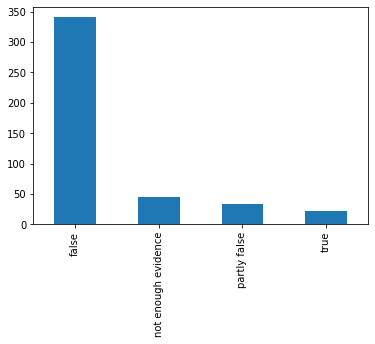

In [22]:
df['label'].value_counts().plot(kind='bar')

In [0]:
df.to_csv('cleaned_politifact_data.csv')